In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29kZXM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_14080/1555994662.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import numpy as np; import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
ozone = pd.read_csv("../donnees/ozone.txt", header=0, sep=";")
mod3 = smf.ols("O3 ~ T12+Vx+Ne12", data=ozone).fit()
print(mod3.conf_int(alpha=0.05))

                   0           1
Intercept  57.158415  111.936250
T12         0.313811    2.316281
Vx          0.149186    0.823705
Ne12       -6.960609   -2.826137


/opt/miniconda3/lib/python3.12/site-packages/matplotlib/patches.py:763: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._x0 = xy[0]
/opt/miniconda3/lib/python3.12/site-packages/matplotlib/patches.py:764: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._y0 = xy[1]
/opt/miniconda3/lib/python3.12/site-packages/matplotlib/patches.py:763: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._x0 = xy[0]
/opt/miniconda3/lib/python3.12/

<Figure size 672x480 with 0 Axes>

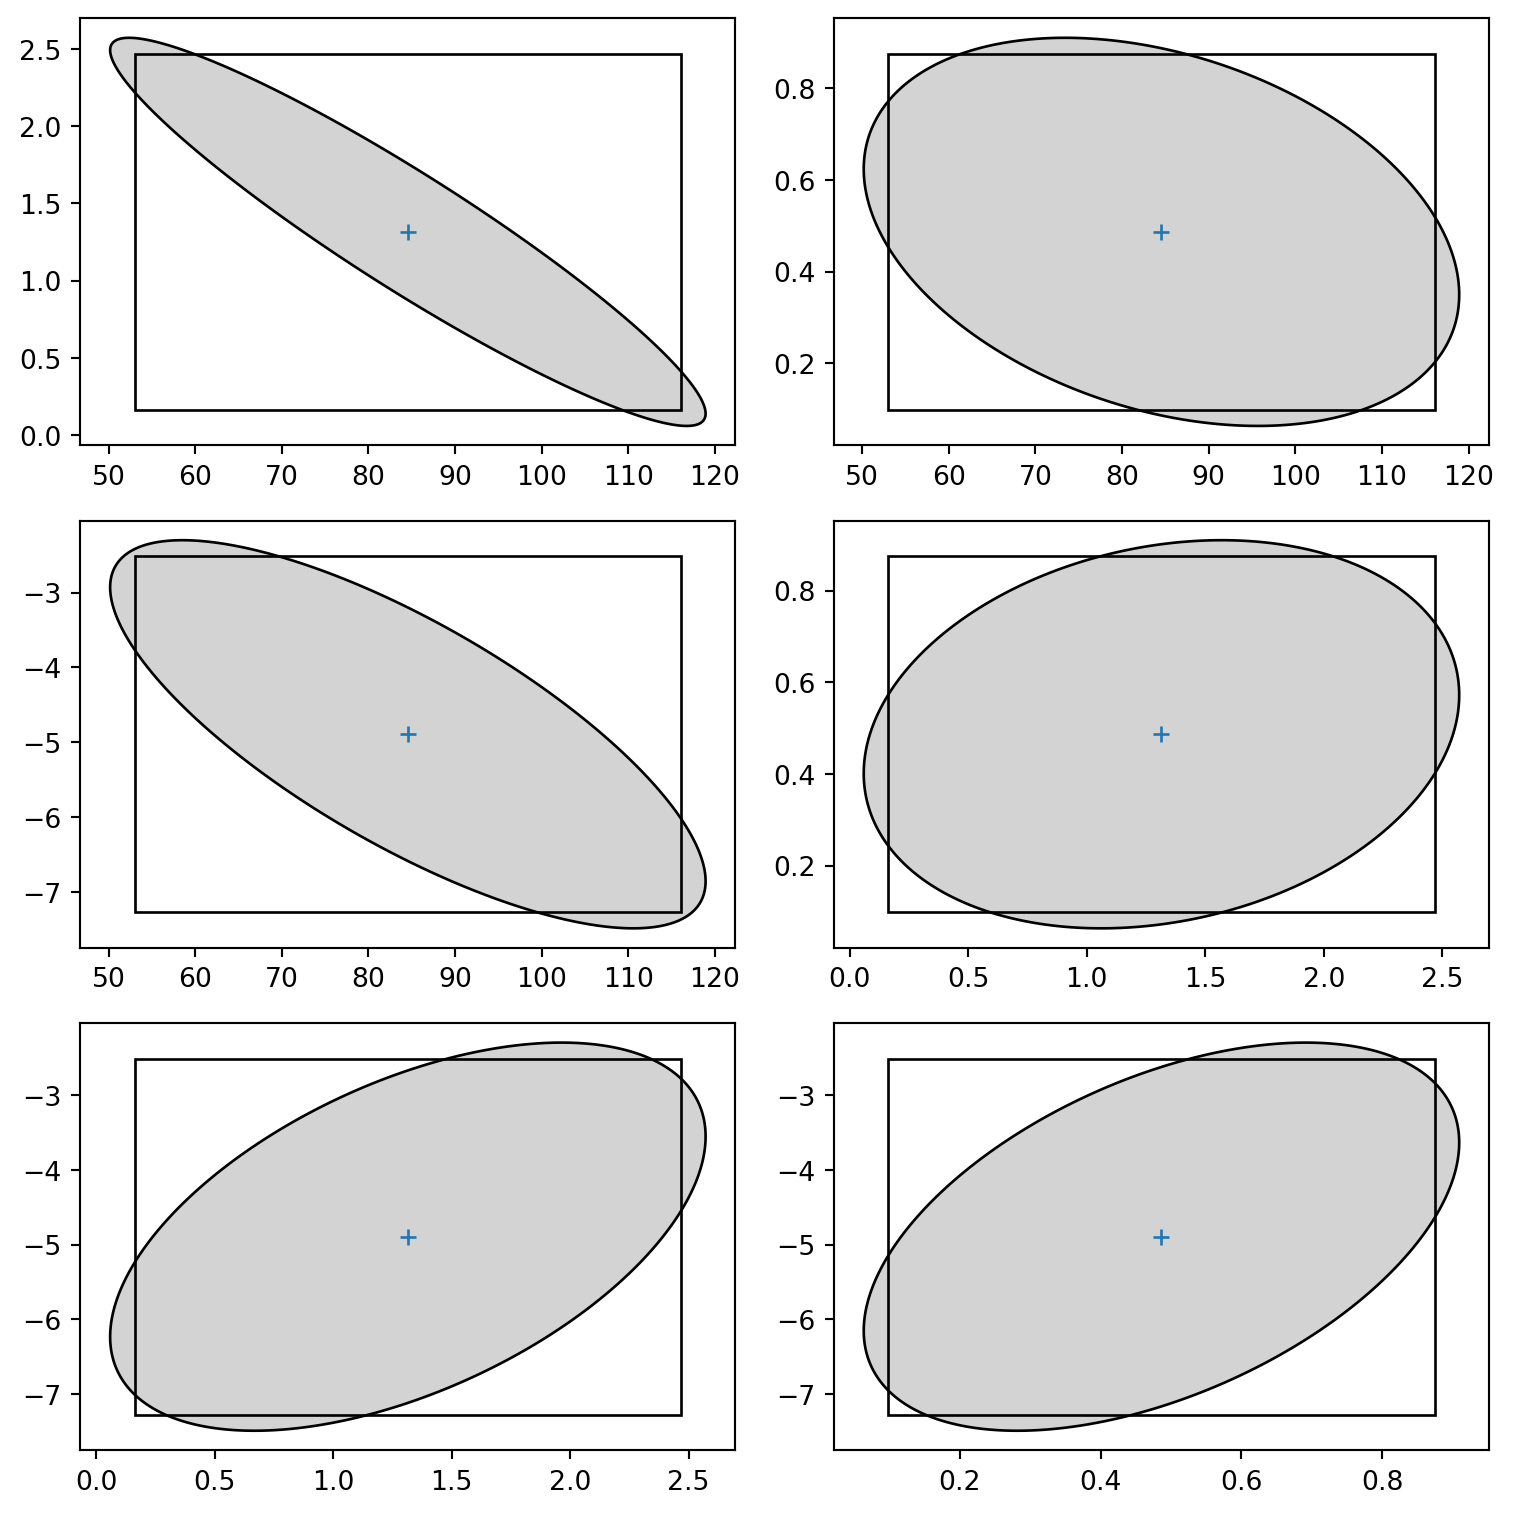

In [4]:
mod3.summary()
ICparams=mod3.conf_int(alpha=0.05)
mod3.params

stats.t.ppf(0.95, mod3.df_resid)

ICparams=mod3.conf_int(alpha=0.025)


def ellipse(m, ij, alpha=0.05, npoints=500):
    import numpy as np
    from scipy.stats import f
    hatSigma = m.cov_params().iloc[ij,ij]
    valpr,vectpr = np.linalg.eig(hatSigma)
    hatSigmademi = vectpr @ np.diag(np.sqrt(valpr))
    theta = np.linspace(0, 2 * np.pi, npoints)
    rho = (2 * f.isf(alpha, 2, m.nobs - 2))**0.5
    XX = np.array([rho * np.cos(theta), rho * np.sin(theta)])
    ZZ = np.add((hatSigmademi @ XX).T, m.params.iloc[ij].to_numpy())
    return ZZ

fig = plt.figure()
fig, axs = plt.subplots(3, 2,figsize=(8, 8))
ic = 0
il = 0
for i in range(0,3):
    for j in range(i+1,4):
        coord = ellipse(mod3, [i, j])
        axs[il,ic].fill(coord[:,0], coord[:,1], fc='lightgrey', ec='k', lw=1)
        axs[il,ic].plot(mod3.params.iloc[i], mod3.params.iloc[j], "+")
        r = matplotlib.patches.Rectangle(ICparams.iloc[[i, j], 0], ICparams.diff(axis=1).iloc[i, 1], ICparams.diff(axis=1).iloc[j, 1], fill=False)
        axs[il,ic].add_artist(r)
        if ic==0:
            ic = 1
        else:
            ic = 0
            il += 1


            
fig.tight_layout()            

In [5]:
#print(mod3.scale*mod3.df_resid/scipy.stats.chi2.ppf(0.975,mod3.df_resid))
#print(mod3.scale*mod3.df_resid/scipy.stats.chi2.ppf(0.025,mod3.df_resid))

In [6]:
mod3 = smf.ols("O3 ~ T12 + Vx + Ne12",data=ozone).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     32.87
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.66e-11
Time:                        15:41:08   Log-Likelihood:                -200.50
No. Observations:                  50   AIC:                             409.0
Df Residuals:                      46   BIC:                             416.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.5473     13.607      6.214      0.000      57.158     111.936
T12            1.3150      0.497      2.644      0.011       0.314       2.316
Vx             0.4864      0.168      2.903      0.006       0.149       0.824
Ne12          -4.8934      1.027     -4.765      0.000      -6.961      -2.826
==============================================================================
Omnibus:                        0.211   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.411
Skew:                          -0.050   Prob(JB):                        0.814
Kurtosis:                       2.567   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
mod3.conf_int(alpha=0.05)

,0,1
Intercept,57.158415,111.936250
T12,0.313811,2.316281
Vx,0.149186,0.823705
Ne12,-6.960609,-2.826137


In [8]:
mod2 = smf.ols("O3 ~ T12 + Vx",data=ozone).fit()
round(sm.stats.anova_lm(mod2,mod3),3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,47.0,13299.399,0.0,NaN,NaN,NaN
1,46.0,8904.622,1.0,4394.777,22.703,0.0


In [9]:
eucalyptus = pd.read_csv("../donnees/eucalyptus.txt",header=0,sep=";")
regS = smf.ols('ht~circ', data=eucalyptus).fit()
regM = smf.ols('ht~circ +  np.sqrt(circ)', data=eucalyptus).fit()
round(sm.stats.anova_lm(regS,regM),3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1427.0,2052.084,0.0,NaN,NaN,NaN
1,1426.0,1840.656,1.0,211.428,163.798,0.0


In [10]:
regM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ht   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     2718.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:41:08   Log-Likelihood:                -2208.5
No. Observations:                1429   AIC:                             4423.
Df Residuals:                    1426   BIC:                             4439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -24.3520      2.614     -9.314      0.000     -29.481     -19.223
circ             -0.4829      0.058     -8.336      0.000      -0.597      -0.369
np.sqrt(circ)     9.9869      0.780     12.798      0.000       8.456      11.518
==============================================================================
Omnibus:                        3.015   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.897
Skew:                          -0.097   Prob(JB):                        0.235
Kurtosis:                       3.103   Cond. No.                     4.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

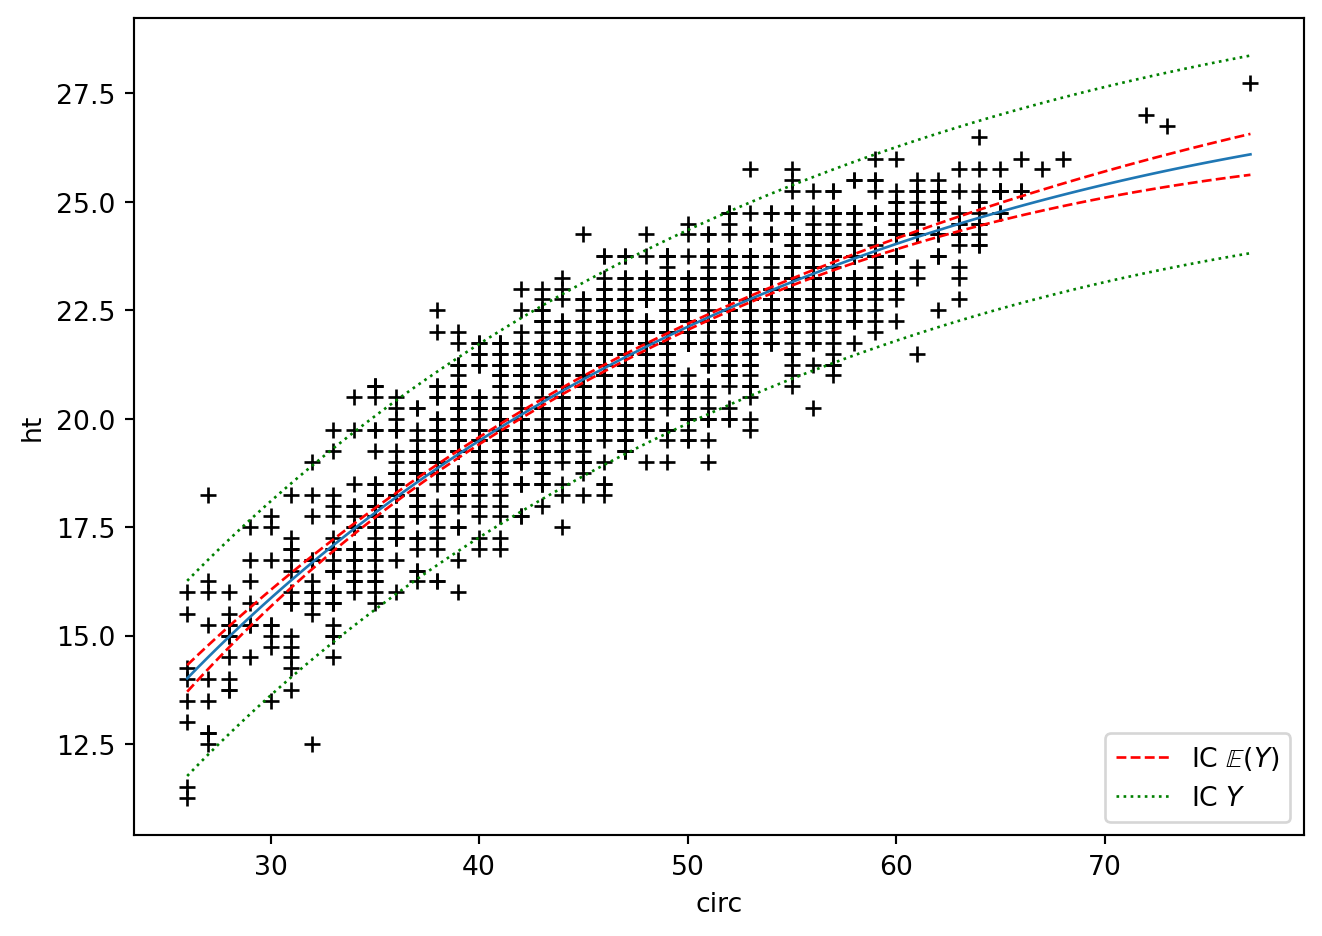

In [11]:
grille = pd.DataFrame({'circ' : np.linspace(eucalyptus["circ"].min(),eucalyptus["circ"].max(),100)})
calculprev = regM.get_prediction(grille)
prev = calculprev.predicted_mean
ICdte = calculprev.conf_int(obs=False, alpha=0.05)
ICpre = calculprev.conf_int(obs=True, alpha=0.05)
fig = plt.figure()
plt.plot(eucalyptus["circ"], eucalyptus["ht"], '+k')
plt.ylabel('ht') ; plt.xlabel('circ')
plt.plot(grille['circ'],  prev, '-', label="E(Y)", lw=1)
lesic, = plt.plot(grille['circ'], ICdte[:,0], 'r--', label=r"IC $\mathbb{E}(Y)$",lw=1)
plt.plot(grille['circ'], ICdte[:, 1], 'r--', lw=1)
lesic2, = plt.plot(grille['circ'], ICpre[:, 0], 'g:', label=r"IC $Y$",lw=1)
plt.plot(grille['circ'], ICpre[:, 1],'g:', lw=1)
plt.legend(handles=[lesic, lesic2], loc='lower right')
fig.tight_layout()

[[ 58.65115402   0.44272441   0.18933792  -6.84767267]
 [108.56181699   2.31524345   0.80828089  -2.7953567 ]]


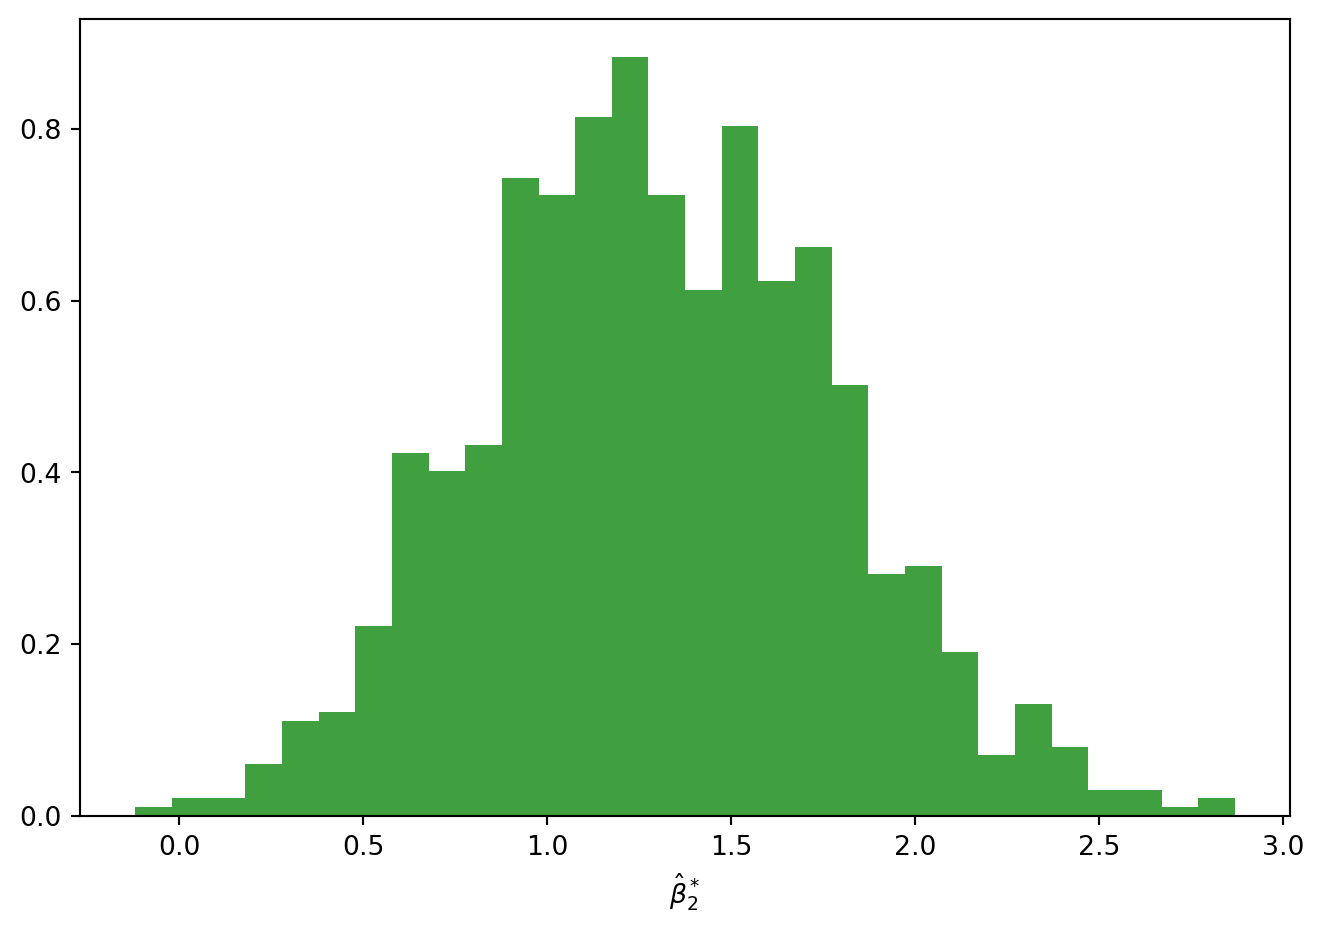

In [12]:
mod3 = smf.ols("O3 ~ 1 + T12 + Vx + Ne12", data = ozone).fit()

mod3.params
mod3.scale
residus3 = mod3.resid
ychap = mod3.fittedvalues
n = residus3.shape[0]

B = 1000
COEFF = np.zeros((B, 4))
rng = np.random.default_rng(seed=1234)
ozoneetoile = ozone[["O3", "T12" , "Vx",  "Ne12"]].copy()
for  b in range(B):
    resetoile = residus3[rng.integers(n, size=n)]
    O3etoile = np.add(ychap.values ,resetoile.values)
    ozoneetoile.loc[:,"O3"] = O3etoile
    regboot = smf.ols("O3 ~ 1+ T12 + Vx + Ne12", data=ozoneetoile).fit()
    COEFF[b] = regboot.params.values

    
print(np.quantile(COEFF,[0.025, 0.975],axis=0))

fig = plt.figure()
n, bins, patches = plt.hist(COEFF[:,1], 30, density=True, facecolor='g', alpha=0.75)
plt.xlabel(r'$\hat \beta_{2}^*$')
fig.tight_layout()